<a href="https://colab.research.google.com/github/cuongle2002/AI-/blob/main/FINAL_PROJECT(AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

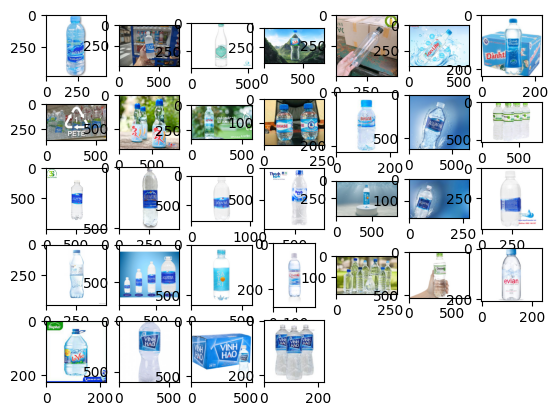

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import  to_categorical
from keras.utils import load_img, img_to_array

import matplotlib.pyplot as plt
from matplotlib.image import imread

from os import listdir

from numpy import asarray
from numpy import save
import numpy as np

folder = '/content/drive/MyDrive/ẢNH CHAI NHỰA /ẢNH CHAI NHƯA/'
for i in range(32):
  plt.subplot(5,7,i+1)
  filename = folder + 'Nuocsuoi('+str(i+1)+').jpg'
  img = imread(filename)
  plt.imshow(img)
plt.show()



In [ ]:
folder = '/content/drive/MyDrive/ẢNH CHAI NHỰA /ẢNH CHAI NHƯA/'
photos, labels  = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Nuocngot7up'):
    output = 1.0
  if file.startswith('NuocngotC2'):
    output = 2.0
  if file.startswith('NuocngotRe'):
    output = 3.0
  if file.startswith('NuocngotSi'):
    output = 4.0
  if file.startswith('NuocngotTra'):
    output = 5.0
  if file.startswith('Nuocsuoi'):
    output = 6.0

  img = load_img(folder+file,target_size=(120,120))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)

x_train = photos.reshape(324,120,120,3)
x_train = x_train.astype('float32')/255

y_train = to_categorical(labels,10)
print(x_train.shape)
print(y_train.shape)

print(photos.shape,labels.shape)
save('/content/ChaiNhua_photos.npy', photos)
save('/content/ChaiNhua_labels.npy', labels)

(324, 120, 120, 3)
(324, 10)
(324, 120, 120, 3) (324,)


In [ ]:
import numpy as np 
x_train = np.load('/content/ChaiNhua_photos.npy')
y_train = np.load('/content/ChaiNhua_labels.npy')
print(x_train.shape)
print(y_train.shape)


(324, 120, 120, 3)
(324,)


In [ ]:
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(120,120,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lan tich chap
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=64,epochs = 45,verbose = 1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 30, 30, 64)       

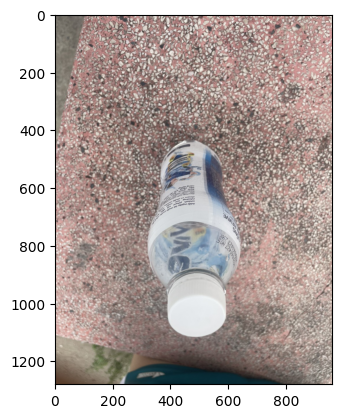

1/1 [==============================] - 0s 20ms/step


array([3])

In [ ]:
img_url = '/content/revive.jpg'
img = plt.imread(img_url)
plt.imshow(img)
plt.show()

x_test=[]
img_test = load_img(img_url, target_size=(120,120))
img_test = img_to_array(img_test)
x_test.append(img_test)
x_test = asarray(x_test)

x_test = x_test.reshape(1,120,120,3)
x_test = x_test.astype('float32')/255

np.argmax(model.predict(x_test), axis = -1)

In [ ]:
model.save("NhanDienChaiNuoc.h5")